## Aim
This script is used to train the models with CNN

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, 
                                     Flatten, 
                                     Dropout, 
                                     Input, 
                                     Conv2D, 
                                     MaxPooling2D, 
                                     BatchNormalization,
                                     Reshape)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [22]:
# Load the processed data
X_train = np.load('data/split/X_train.npy')
y_train = np.load('data/split/y_train.npy')
X_test = np.load('data/split/X_test.npy')
y_test = np.load('data/split/y_test.npy')

## Model 2: CNN & Data Augmentation while training


In [23]:
# Current architecture with improvements
# Reshape the data
X_train_reshaped = X_train.reshape(-1, 100, 100, 1)
X_test_reshaped = X_test.reshape(-1, 100, 100, 1)


model = Sequential([
    Input(shape=(100, 100,1)), # Input layer specifying the shape of the input images
    Reshape((100, 100, 1)),  # Reshape the input to add a channel dimension (grayscale)
    
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same'), # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and same padding
    BatchNormalization(), # Batch normalization layer to stabilize the training process
    MaxPooling2D((2, 2)), # Max pooling layer with a pool size of 2x2
    Dropout(0.25), # Dropout layer to prevent overfitting
    
    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(), # Flattens the 3D output to 1D
    Dense(256, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')  # The softmax activation function is used to output probabilities for each class, ensuring that the sum of the outputs is 1.
])

# Improved compilation settings
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Lower learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Add early stopping

In [24]:
# Add callbacks for better training
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

# Modified training
history = model.fit(
    X_train_reshaped, y_train,
    validation_split=0.2,
    epochs=100,  # Increase epochs since we have early stopping
    batch_size=32,  # Modified batch size
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 894ms/step - accuracy: 0.3766 - loss: 1.7398 - val_accuracy: 0.4028 - val_loss: 1.1855 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5446 - loss: 1.2253 - val_accuracy: 0.3542 - val_loss: 2.5643 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5714 - loss: 1.1303 - val_accuracy: 0.3542 - val_loss: 2.9486 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5961 - loss: 1.0222 - val_accuracy: 0.3542 - val_loss: 3.4632 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5491 - loss: 1.0663 - val_accuracy: 0.3542 - val_loss: 3.8465 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 546ms/step - accuracy: 0.6241 - loss: 1.0080 - val_accuracy: 0.3542 - val_loss: 4.3197 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 863ms/step - accuracy: 0.5994 - loss: 0.9616 

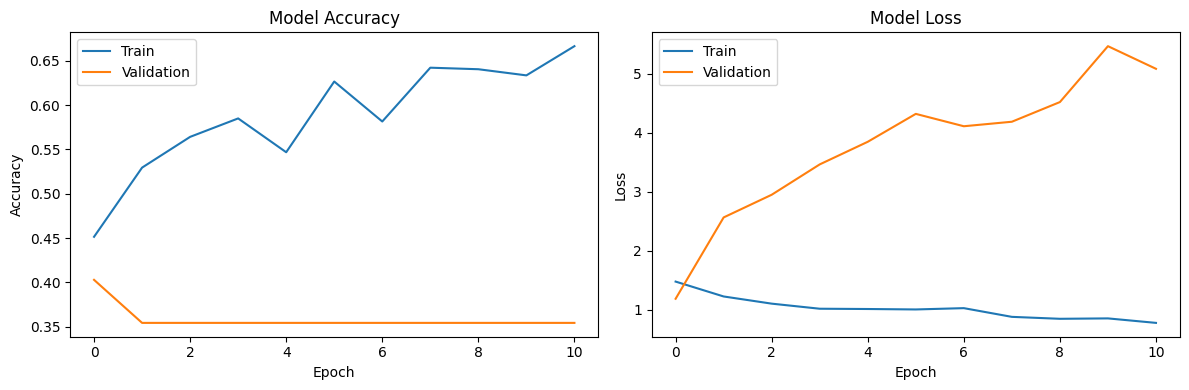

In [26]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

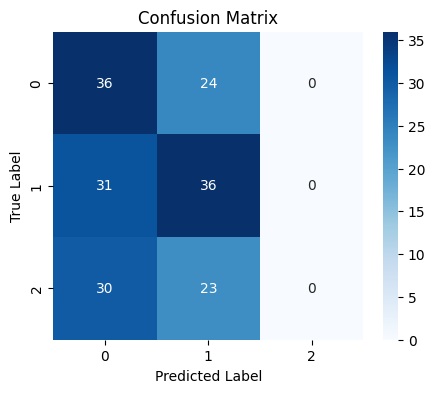

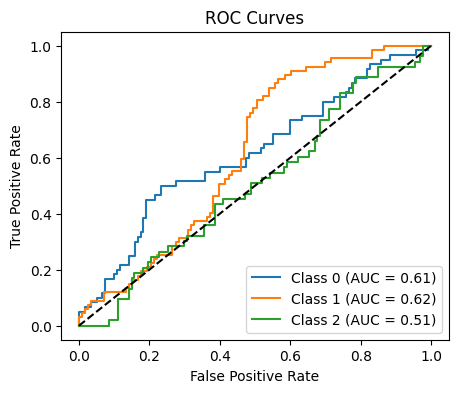


Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.60      0.46        60
           1       0.43      0.54      0.48        67
           2       0.00      0.00      0.00        53

    accuracy                           0.40       180
   macro avg       0.27      0.38      0.31       180
weighted avg       0.29      0.40      0.33       180


Overall Accuracy: 0.4000


In [25]:
def evaluate_model(model, X_test, y_test):
    """
    Comprehensive model evaluation
    """
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    report = classification_report(y_test, y_pred_classes)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curves
    plt.figure(figsize=(5, 4))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred[:, i])
        auc = roc_auc_score(y_test == i, y_pred[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()
    
    # Print metrics
    print("\nClassification Report:")
    print(report)
    print(f"\nOverall Accuracy: {accuracy:.4f}")

# Use the evaluation function
evaluate_model(model, X_test_reshaped, y_test)

## Parameter tuning

In [10]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras

# Define your model building function
def create_model(units=32, activation='relu', learning_rate=0.001):
    model = keras.Sequential([
        # Add Flatten layer to convert 2D input to 1D
        keras.layers.Flatten(input_shape=(100, 100,1)),  # Specify the input shape excluding batch size
        keras.layers.Dense(units, activation=activation),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create the KerasClassifier
model = KerasClassifier(
    model=create_model,
    verbose=0
)

# Define parameter distribution
param_dist = {
    'model__units': [16, 32, 64],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': [0.001, 0.01, 0.1]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1
)

# Fit the random search
random_search.fit(X_train_reshaped, y_train)
# Print results
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=16; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=16; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=16; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.1, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.1, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.1, model__units=64; total time=   0.7s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.01, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.01, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.01, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.01, model__units=16; total time=   0.5s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.01, model__units=16; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.01, model__units=16; total time=   0.5s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.01, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.01, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.01, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.1, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.1, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.1, model__units=32; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.1, model__units=16; total time=   0.7s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.1, model__units=16; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.1, model__units=16; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.001, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.001, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=tanh, model__learning_rate=0.001, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__activation=relu, model__learning_rate=0.001, model__units=64; total time=   0.6s


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters: {'model__units': 32, 'model__learning_rate': 0.001, 'model__activation': 'relu'}
Best score: 0.5333333333333333


In [11]:
best_params = {
    'model__units': 32,
    'model__learning_rate': 0.001,
    'model__activation': 'relu'
}

model = create_model(
    units=best_params['model__units'],
    learning_rate=best_params['model__learning_rate'],
    activation=best_params['model__activation']
)

# Step 4: Train the model
# Assuming you have your training data in X_train_reshaped and y_train_encoded
history = model.fit(X_train_reshaped, y_train,  # Use y_train directly if it's integer-encoded
                    batch_size=64,  # You can adjust the batch size as needed
                    epochs=20,      # You can adjust the number of epochs as needed
                    validation_split=0.2,  # Use 20% of the data for validation
                    shuffle=True)  # Shuffle the training data

Epoch 1/20


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3355 - loss: 1.7886 - val_accuracy: 0.3542 - val_loss: 1.2541
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3653 - loss: 1.1632 - val_accuracy: 0.3681 - val_loss: 1.0678
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4091 - loss: 1.0558 - val_accuracy: 0.4653 - val_loss: 1.0706
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4402 - loss: 1.0504 - val_accuracy: 0.5556 - val_loss: 1.0282
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5330 - loss: 1.0023 - val_accuracy: 0.5903 - val_loss: 1.0173
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5124 - loss: 1.0094 - val_accuracy: 0.5625 - val_loss: 1.0155
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5397 - loss: 0.9697 - val_accuracy: 0.5903 - val_loss: 0.9962
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5514 - loss: 0.9504 - val_accuracy: 0.5903 - val_loss: 0.9803
Epoch 9/20
9/9 ━━

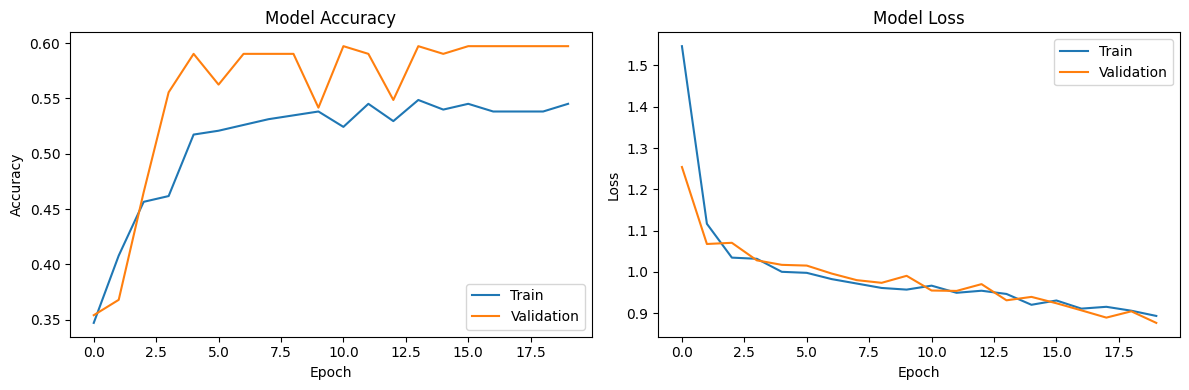

In [18]:
plot_training_history(history)

In [12]:
# Save the model
model.save('CNN_tuned.h5')
model.save('CNN_tuned.keras')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


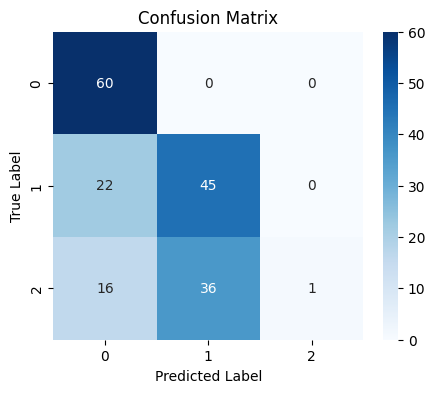

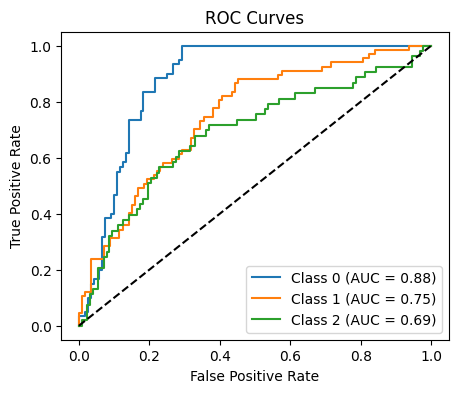


Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        60
           1       0.56      0.67      0.61        67
           2       1.00      0.02      0.04        53

    accuracy                           0.59       180
   macro avg       0.72      0.56      0.47       180
weighted avg       0.71      0.59      0.49       180


Overall Accuracy: 0.5889


In [13]:
def evaluate_model(model, X_test, y_test):
    """
    Comprehensive model evaluation
    """
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    report = classification_report(y_test, y_pred_classes)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curves
    plt.figure(figsize=(5, 4))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred[:, i])
        auc = roc_auc_score(y_test == i, y_pred[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()
    
    # Print metrics
    print("\nClassification Report:")
    print(report)
    print(f"\nOverall Accuracy: {accuracy:.4f}")

# Use the evaluation function
evaluate_model(model, X_test_reshaped, y_test)

Add data augmentation during training

Add model evaluation function


Cross validation

In [15]:
from sklearn.model_selection import KFold

def cross_validate_model(X, y, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        print(f"\nFold {fold + 1}/{n_splits}")
        
        # Split data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Create and train model
        model = create_model(
            units=best_params['model__units'],
            learning_rate=best_params['model__learning_rate'],
            activation=best_params['model__activation'])
        
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=20,
            callbacks=callbacks,
            verbose=1
        )
        
        # Evaluate
        score = model.evaluate(X_val, y_val, verbose=0)
        scores.append(score[1])  # Append accuracy
        
    print(f"\nCross-validation scores: {scores}")
    print(f"Mean accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

In [17]:
cross_validate_model(X_train_reshaped, y_train)


Fold 1/5
Epoch 1/20


/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4204 - loss: 1.5481 - val_accuracy: 0.5833 - val_loss: 0.8856 - learning_rate: 0.0010
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4228 - loss: 0.9894 - val_accuracy: 0.5417 - val_loss: 0.9911 - learning_rate: 0.0010
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5841 - loss: 0.8658 - val_accuracy: 0.5764 - val_loss: 0.8785 - learning_rate: 0.0010
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5530 - loss: 0.9036 - val_accuracy: 0.5625 - val_loss: 0.8883 - learning_rate: 0.0010
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6236 - loss: 0.8329 - val_accuracy: 0.5625 - val_loss: 0.8715 - learning_rate: 0.0010
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5681 - loss: 0.8632 - val_accuracy: 0.5694 - val_loss: 0.8421 - learning_rate: 0.0010
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5592 - loss: 0.8354 - val_accuracy: 0.5347 - v